In [2]:
## User friendly function that makes bar plots of the 6 metrics Disney uses to rate our performance and 
## how our performance compares to the best and worst performing CDNs 
## Note some of the data from Disney may not be the reliable 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

def Disney_plots():
    
    ## Get paths from user and convert to string
    path_CTL = input("Enter path to CenturyLink CDN data: ")
    path_best = input("Enter path to Best CDN data: ")
    path_worst = input("Enter path to Worst CDN data: ")
    
    ## Read CSV files into dataframes, replace empty elements with NA's
    df_CTL = pd.read_csv(path_CTL, header = None, index_col = 0)
    df_best = pd.read_csv(path_best, header = None, index_col = 0)
    df_worst = pd.read_csv(path_worst, header = None, index_col = 0)
    df_CTL.replace('  ', np.nan, inplace = True)
    df_best.replace('  ', np.nan, inplace = True)
    df_worst.replace('  ', np.nan, inplace = True)
    
    ## Input the desired region and subset the data
    region = input("Enter desired region: ")
    df_CTL = df_CTL.loc[region]
    df_best = df_best.loc[region]
    df_worst = df_worst.loc[region]
    
    ## Print how many NA's there are 
    num_na = df_CTL.isna().sum().sum() + df_best.isna().sum().sum() + df_worst.isna().sum().sum()
    if (num_na != 0):
        print('WARNING: there are {} NAs in your data. These will be imputed with the row average'.format(num_na))
    
    ## Impute NA's with row average (median may be better)
    df_CTL.T.fillna(df_CTL.mean(axis=1)).T
    df_best.T.fillna(df_best.mean(axis=1)).T
    df_worst.T.fillna(df_worst.mean(axis=1)).T
    
    ## Compute means/standard dev for each metric
    means_CTL = df_CTL.mean(axis = 1)
    means_best = df_best.mean(axis = 1)
    means_worst = df_worst.mean(axis = 1)
    sd_CTL = df_CTL.std(axis = 1)
    sd_best = df_best.std(axis = 1)
    sd_worst = df_worst.std(axis = 1)
    
    ## Make bar plots for the mean of each metric for the CenturyLink, Best and Worst performing CDN
    ## with the corresponding standard devitations as errors
    
    labels = ['Start Failures (%)', 'Exits before Start (%)', 'Startup Time (sec)',
          'Rebuffering Ratio (%)', 'Restart Time (sec)', 'Playback Failures (%)']
    x = np.arange(len(labels))
    width = 0.5
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)
    rects1 = ax.bar(x - width/2, means_CTL, width/2, yerr = sd_CTL , label='CTL', alpha =.7, color = 'g', capsize = 3)
    rects2 = ax.bar(x , means_best, width/2, yerr = sd_best, label='Best', alpha =.75, color ='b', capsize = 3)
    rects3 = ax.bar(x + width/2, means_worst , width/2, yerr= sd_worst, label='Worst', alpha = .8, color ='r', capsize = 3)
    ax.set_ylabel('Averaged Values')
    ax.set_title('Relative Performance of Level3 CDN ({})'.format(region))
    ax.set_xticks(x)
    plt.xticks(rotation=330, ha='left')
    ax.set_xticklabels(labels, fontsize = 8)
    ax.legend()
    plt.tight_layout()
    
    ## Option to save figure 
    save = input("Would you like to save this figure? Enter 'Yes/No' : ")
    if (save == 'Yes'):
        fig_path = input("Enter path to directory you would like to save this figure: ")
        plt.savefig(fig_path)
    
    return None 
    


Enter path to CenturyLink CDN data: Disney_may20.csv
Enter path to Best CDN data: Disney_may20_best.csv
Enter path to Worst CDN data: Disney_may20_worst.csv
Enter desired region: EU West 2
Would you like to save this figure? Enter 'Yes/No' : No 


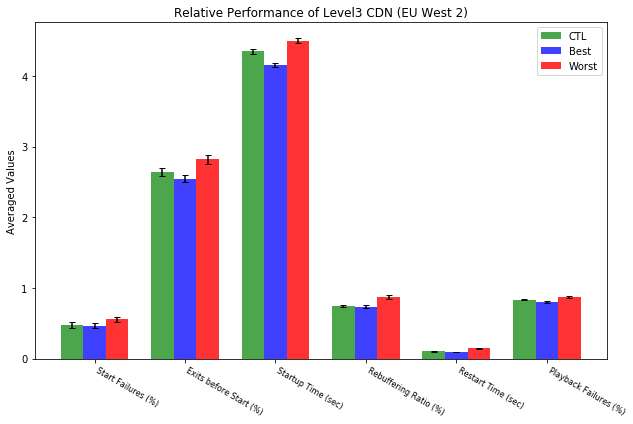

In [3]:
Disney_plots()